In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
import sys
import os

cwd = os.getcwd()
h, _ = os.path.split(cwd)
h, _ = os.path.split(h)

sys.path.append(h)

from scripts import viz, metrics

## Data

In [3]:
sb_train = pd.read_csv("../../data/mock/SB_train.csv")
sb_train = shuffle(sb_train, random_state=42)
sb_train.head()

,0,1,2,3,4,5
104241,2.240883,0.044684,0.181221,0.682562,0.701108,0.0
199676,2.642468,0.097458,0.001250,0.417947,0.370665,0.0
140199,6.199139,0.415525,0.146013,0.677517,0.393195,0.0
132814,3.267094,0.218941,0.059742,0.382557,0.479382,0.0
408697,2.627615,0.156675,0.014994,0.480690,0.732614,0.0


In [4]:
sb_val = pd.read_csv("../../data/mock/SB_val.csv")
sb_val = shuffle(sb_val, random_state=42)
sb_val.head()

,0,1,2,3,4,5
362904,1.931735,0.084565,0.087224,0.788175,0.519688,0.0
55584,4.263740,0.204174,0.544531,0.756502,0.267221,0.0
265825,2.826199,0.153330,0.206897,0.337110,0.546553,0.0
154679,2.526338,0.050504,0.425461,0.671376,0.416069,0.0
240162,2.957643,0.080162,0.452233,0.847452,0.516287,0.0


In [5]:
sb_train.shape, sb_val.shape

((500000, 6), (378876, 6))

In [6]:
X_train = sb_train[['1', '2', '3', '4']].values
C_train = sb_train[['0']].values

X_val = sb_val[['1', '2', '3', '4']].values
C_val = sb_val[['0']].values

## Best metric values for validation sample

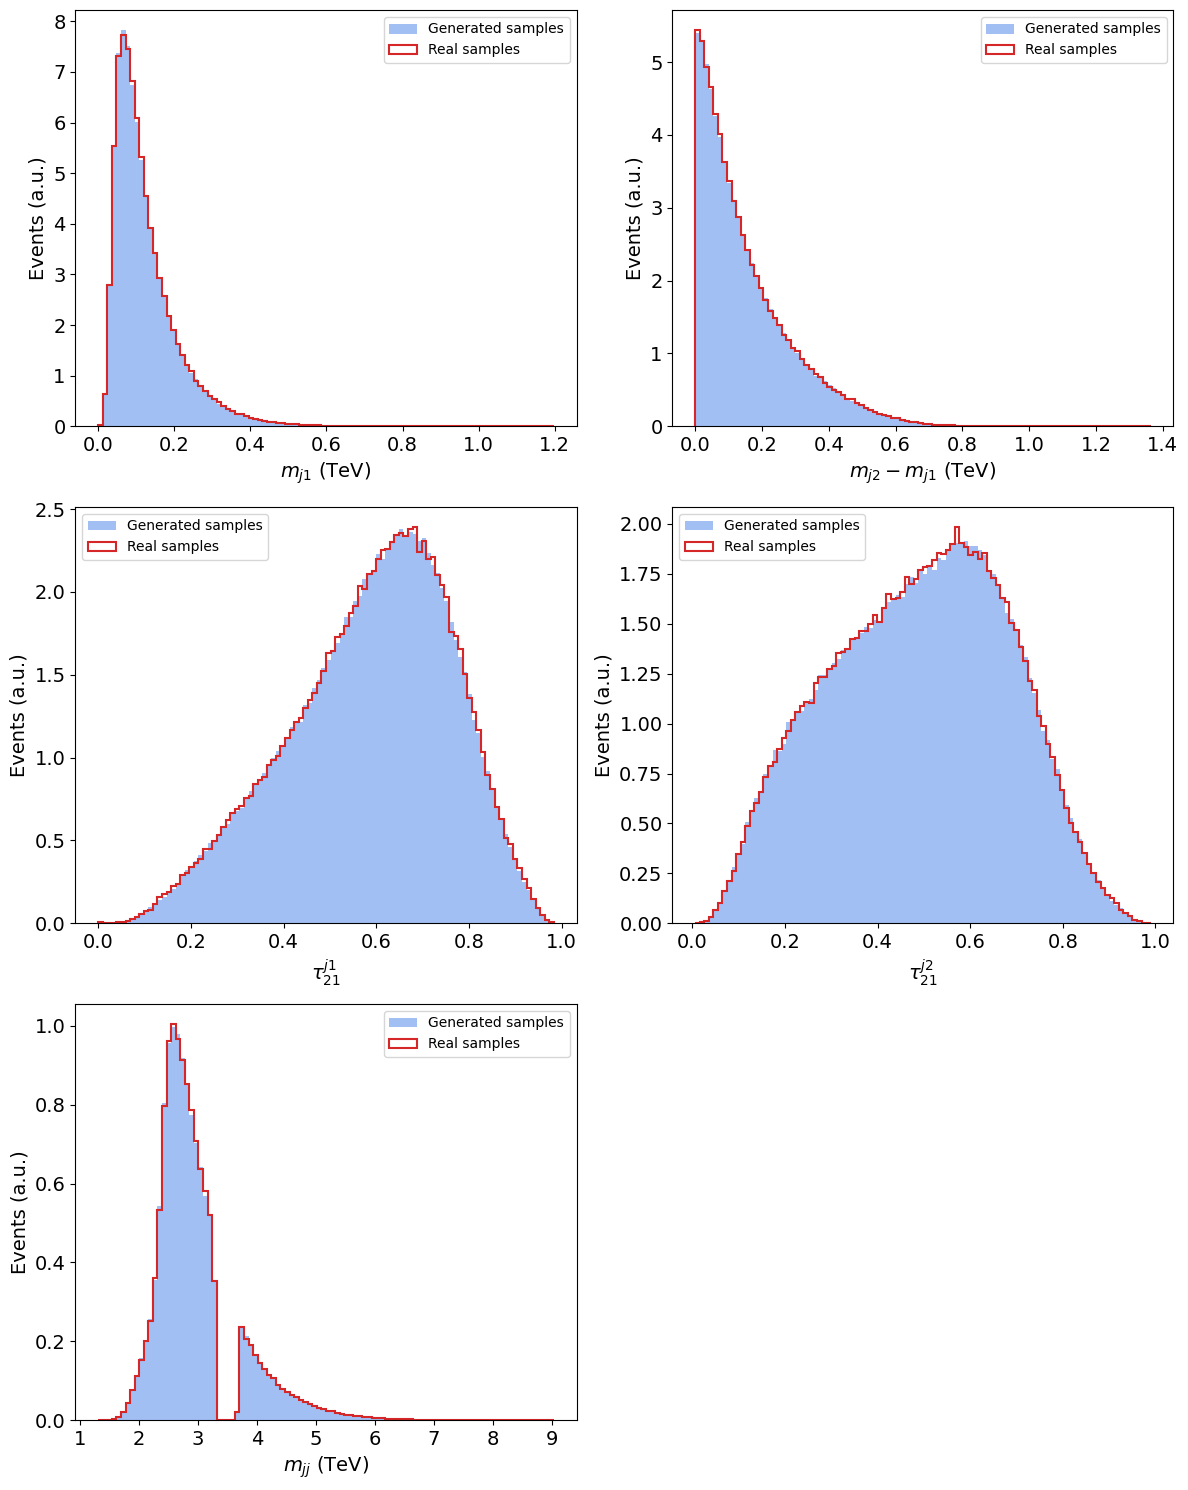

In [7]:
X_train_sh, C_train_sh = shuffle(X_train, C_train, random_state=42, n_samples=len(X_val))
viz.plot_histograms(X_val, C_val, X_train_sh, C_train_sh)

In [8]:
%%time
metrics.get_metrics(X_val, C_val, X_train_sh, C_train_sh)

Frechet Distance         = 0.000146 +- 0.000050
Kolmogorov-Smirnov       = 0.002959 +- 0.000316
Cramer-von Mises         = 0.373179 +- 0.128594
Anderson-Darling         = 1.439064 +- 0.704432
Kullback-Leibler KDE     = 0.000040 +- 0.000005
Jensen-Shannon KDE       = 0.000008 +- 0.000002
CPU times: total: 15min 21s
Wall time: 15min 26s


#  B. Interpolation and sampling

In [10]:
sr_train = pd.read_csv("../../data/mock/SR_train.csv")
sr_train = shuffle(sr_train, random_state=42)

sr_val = pd.read_csv("../../data/mock/SR_val.csv")
sr_val = shuffle(sr_train, random_state=42)

sr_train.shape, sr_val.shape

((60000, 6), (60000, 6))

In [11]:
# select only background events
sr_train_bkg = sr_train[sr_train['5'] == 0]
sr_val_bkg = sr_val[sr_val['5'] == 0]

sr_train_bkg.shape, sr_val_bkg.shape

((59605, 6), (59605, 6))

## Data processing

In [12]:
X_sr_train = sr_train[['1', '2', '3', '4']].values
C_sr_train = sr_train[['0']].values

X_sr_val = sr_val[['1', '2', '3', '4']].values
C_sr_val = sr_val[['0']].values

In [13]:
X_sr_train_bkg = sr_train_bkg[['1', '2', '3', '4']].values
C_sr_train_bkg = sr_train_bkg[['0']].values

X_sr_val_bkg = sr_val_bkg[['1', '2', '3', '4']].values
C_sr_val_bkg = sr_val_bkg[['0']].values

##  Best possible metrics values

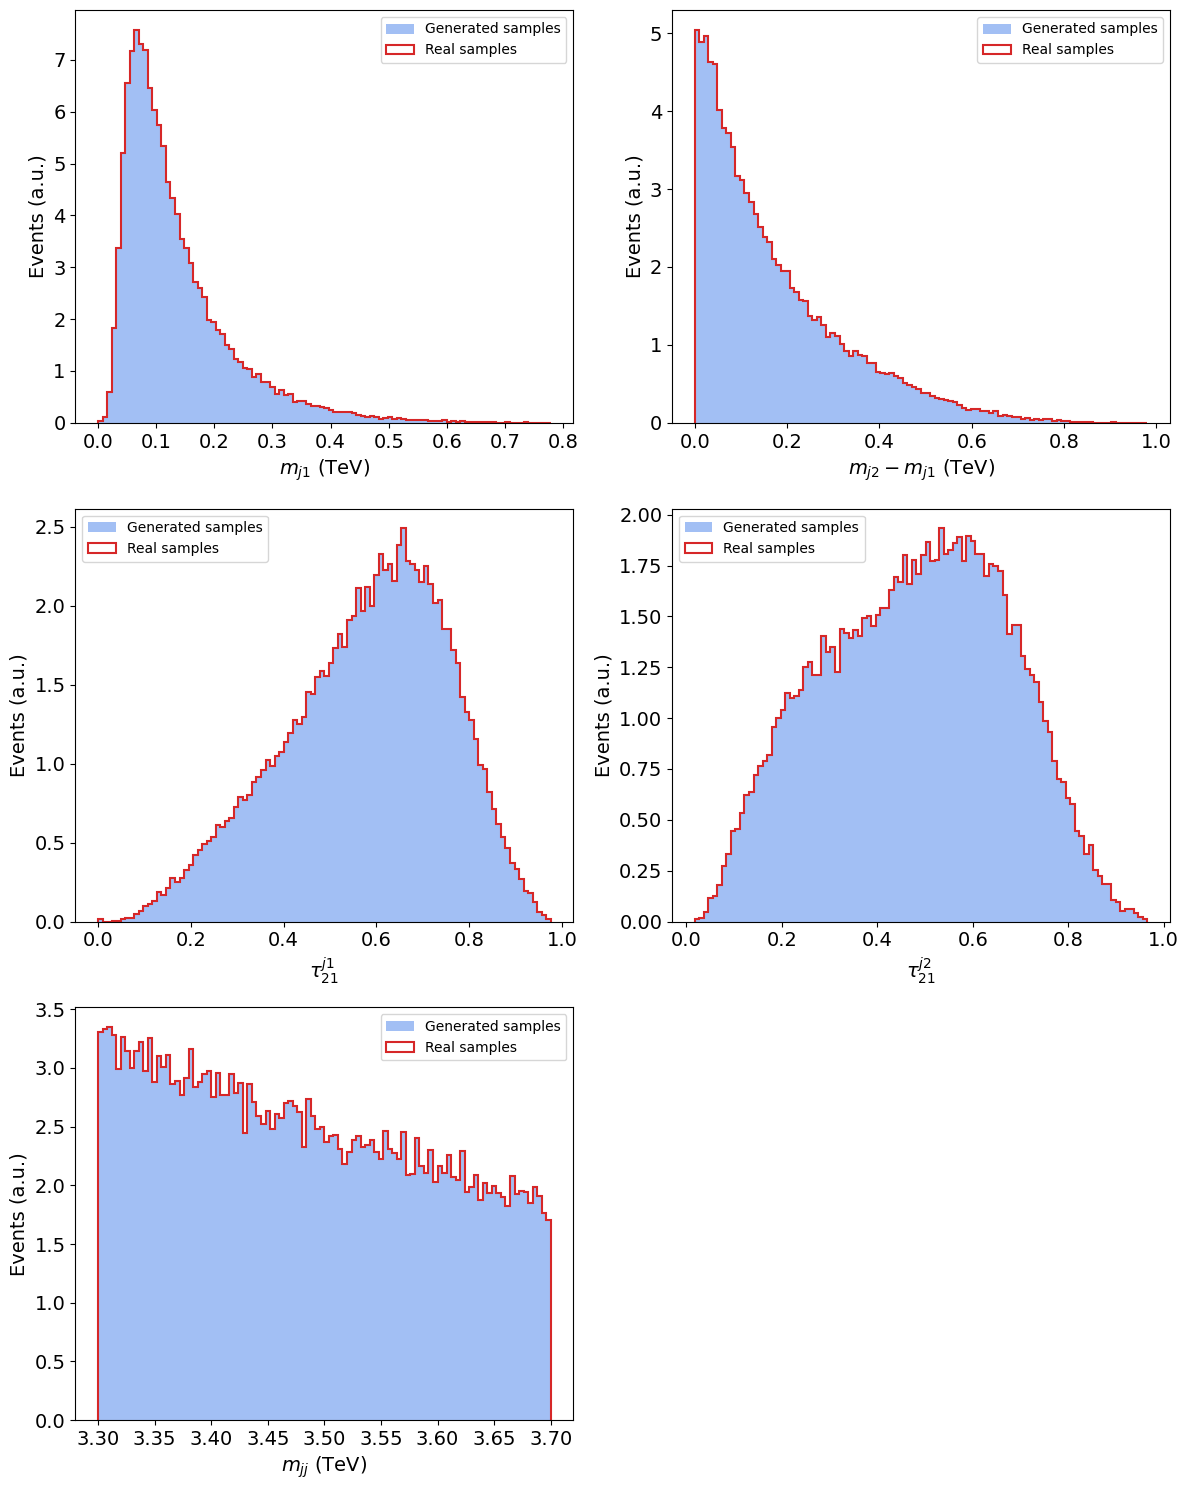

In [14]:
viz.plot_histograms(X_sr_val_bkg, C_sr_val_bkg, X_sr_train_bkg, C_sr_train_bkg)

bkg vs bkg

In [15]:
%%time
metrics.get_metrics(X_sr_val_bkg, C_sr_val_bkg, X_sr_train_bkg, C_sr_train_bkg)

Frechet Distance         = 0.000446 +- 0.000169
Kolmogorov-Smirnov       = 0.005038 +- 0.000758
Cramer-von Mises         = 0.162062 +- 0.061234
Anderson-Darling         = -0.008527 +- 0.466029
Kullback-Leibler KDE     = 0.000016 +- 0.000008
Jensen-Shannon KDE       = 0.000005 +- 0.000001
CPU times: total: 1min 45s
Wall time: 1min 46s


bkg only vs bkg+sig

In [16]:
%%time
metrics.get_metrics(X_sr_val_bkg, 
                    C_sr_val_bkg, 
                    X_sr_train[:len(X_sr_val_bkg)], 
                    C_sr_train[:len(X_sr_val_bkg)])

Frechet Distance         = 0.000790 +- 0.000282
Kolmogorov-Smirnov       = 0.006061 +- 0.001035
Cramer-von Mises         = 0.306096 +- 0.133529
Anderson-Darling         = 0.872790 +- 0.821374
Kullback-Leibler KDE     = 0.000044 +- 0.000019
Jensen-Shannon KDE       = 0.000007 +- 0.000003
CPU times: total: 1min 47s
Wall time: 1min 48s
